In [48]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error,r2_score,classification_report,mean_absolute_error,mean_absolute_percentage_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter(action="ignore")

In [3]:
df = pd.read_csv(r'diabets.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Preprocessing

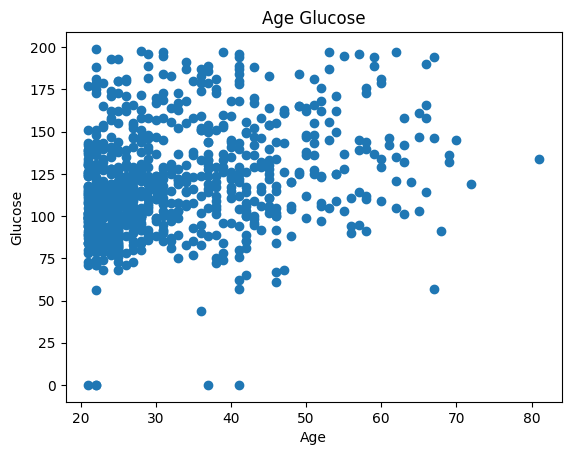

In [4]:
plt.scatter(df.Age, df.Glucose)
plt.title('Age Glucose')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.show()

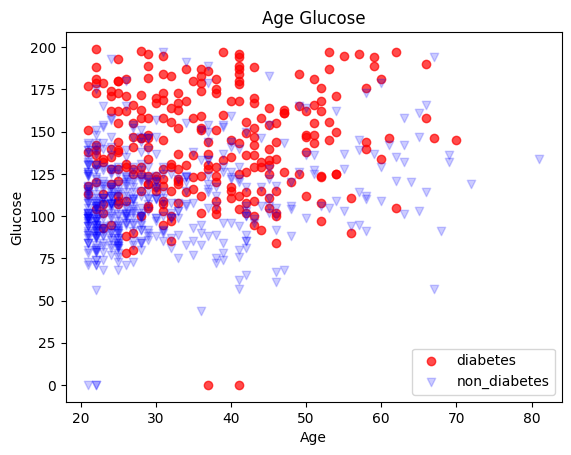

In [5]:
plt.scatter(df[df['Outcome']==1].Age, df[df['Outcome']==1].Glucose, color='red', label= 'diabetes', alpha = 0.7)
plt.scatter(df[df['Outcome']==0].Age, df[df['Outcome']==0].Glucose, color='blue', label= 'non_diabetes', alpha = 0.2, marker = 'v')
plt.title('Age Glucose')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend()
plt.show()

<Axes: >

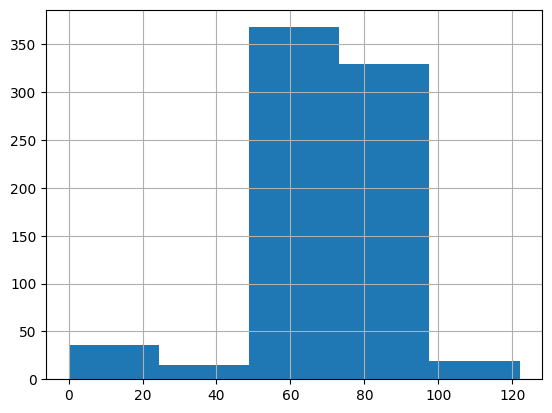

In [6]:
df['BloodPressure'].hist(bins = 5)

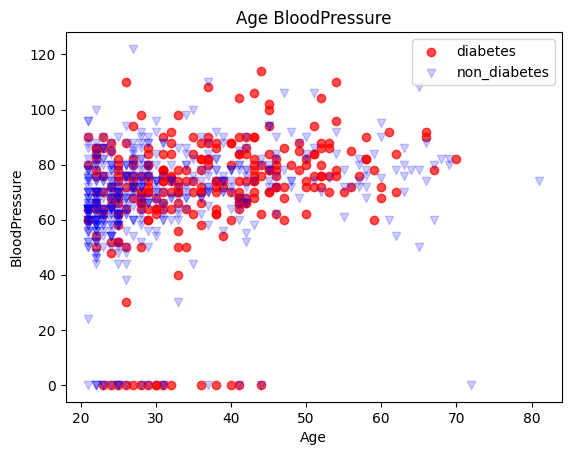

In [7]:
plt.scatter(df[df['Outcome']==1].Age, df[df['Outcome']==1].BloodPressure, color='red', label= 'diabetes', alpha = 0.7)
plt.scatter(df[df['Outcome']==0].Age, df[df['Outcome']==0].BloodPressure, color='blue', label= 'non_diabetes', alpha = 0.2, marker = 'v')
plt.title('Age BloodPressure')
plt.xlabel('Age')
plt.ylabel('BloodPressure')
plt.legend()
plt.show()

<Axes: >

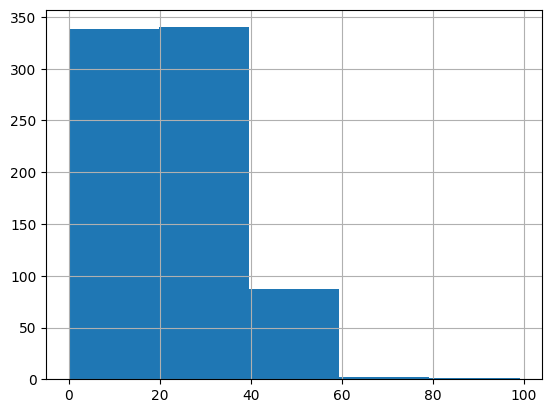

In [8]:
df['SkinThickness'].hist(bins = 5)

<Axes: >

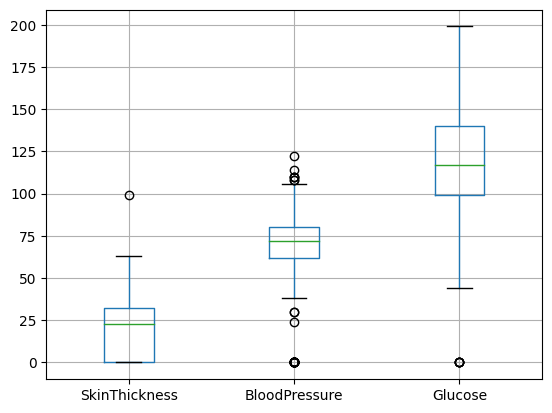

In [9]:
boxplot = df.boxplot(column = ['SkinThickness', 'BloodPressure', 'Glucose'])
boxplot

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [58]:
df.shape

(768, 9)

In [39]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

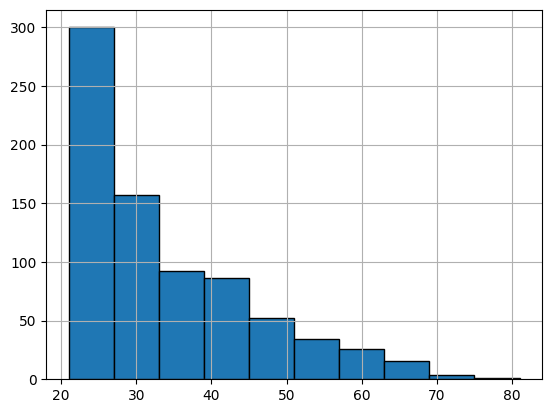

In [40]:
df['Age'].hist(edgecolor = 'black')

<Axes: xlabel='BMI', ylabel='Density'>

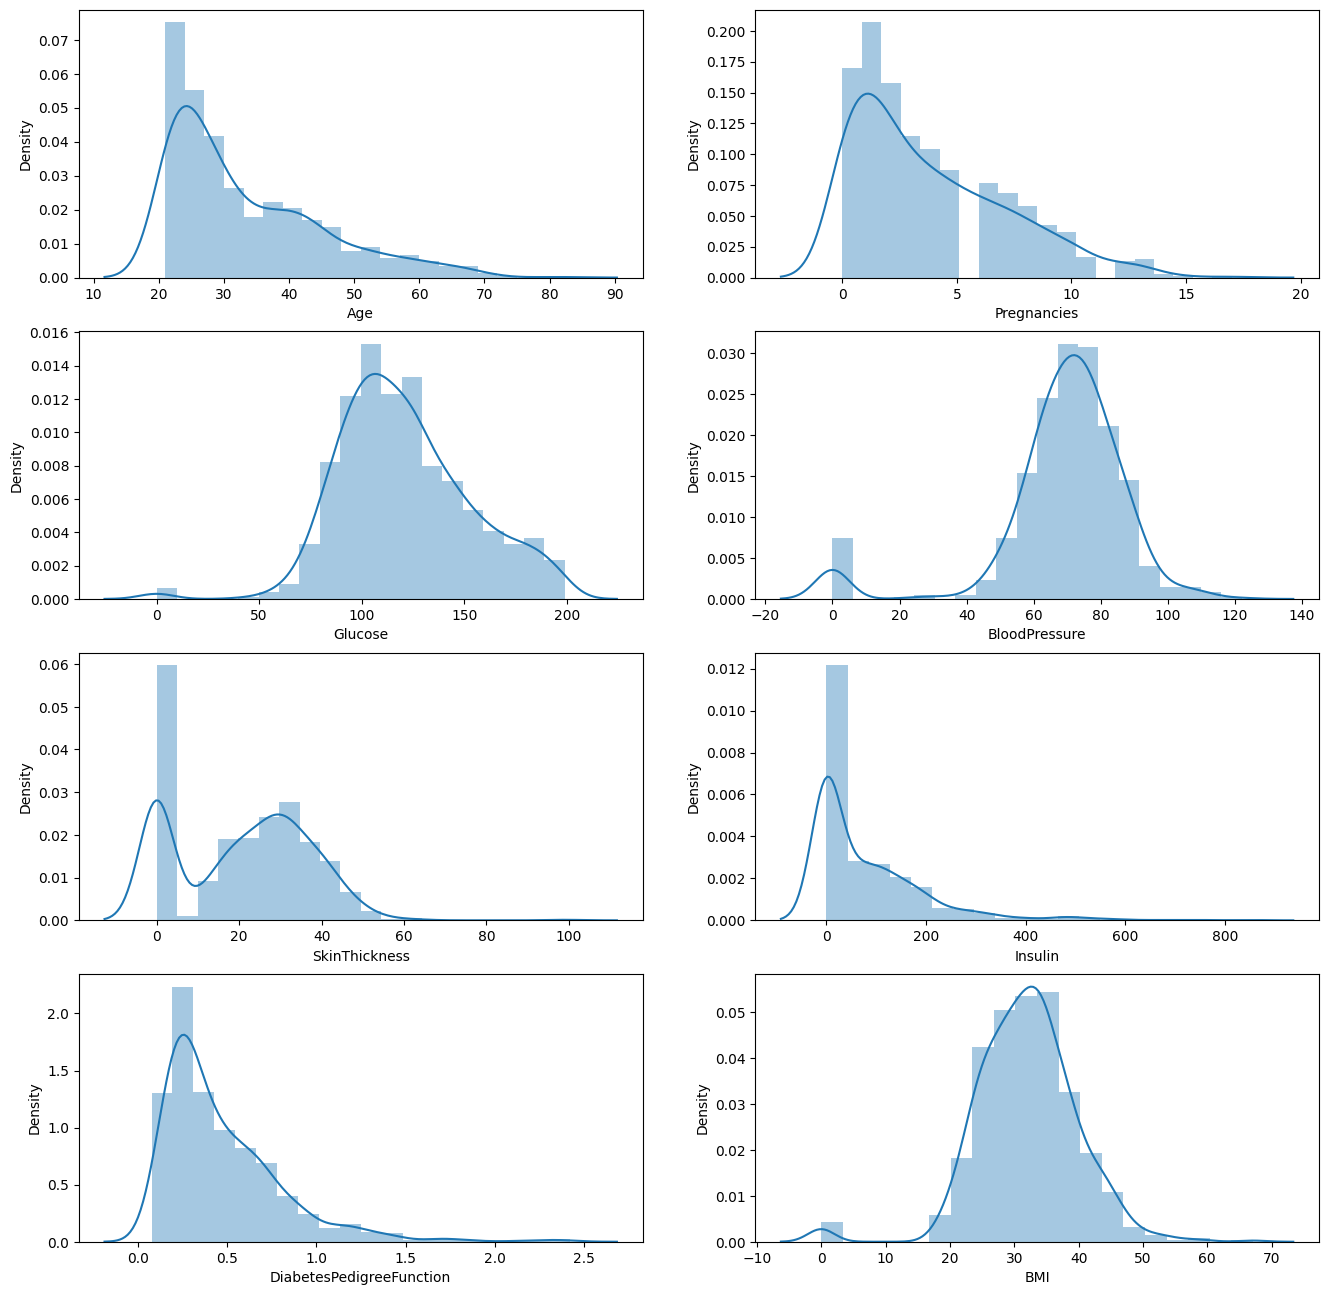

In [41]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins=20, ax=ax[0,0])
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,1])
sns.distplot(df.Glucose, bins=20, ax=ax[1,0])
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,1])
sns.distplot(df.SkinThickness, bins=20, ax=ax[2,0])
sns.distplot(df.Insulin, bins=20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0])
sns.distplot(df.BMI, bins=20, ax=ax[3,1])

In [42]:
df.groupby('Outcome').agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [43]:
df.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [44]:
df.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [45]:
df.groupby("Outcome").agg({"Insulin":"mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [46]:
df.groupby("Outcome").agg({"BMI":"mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


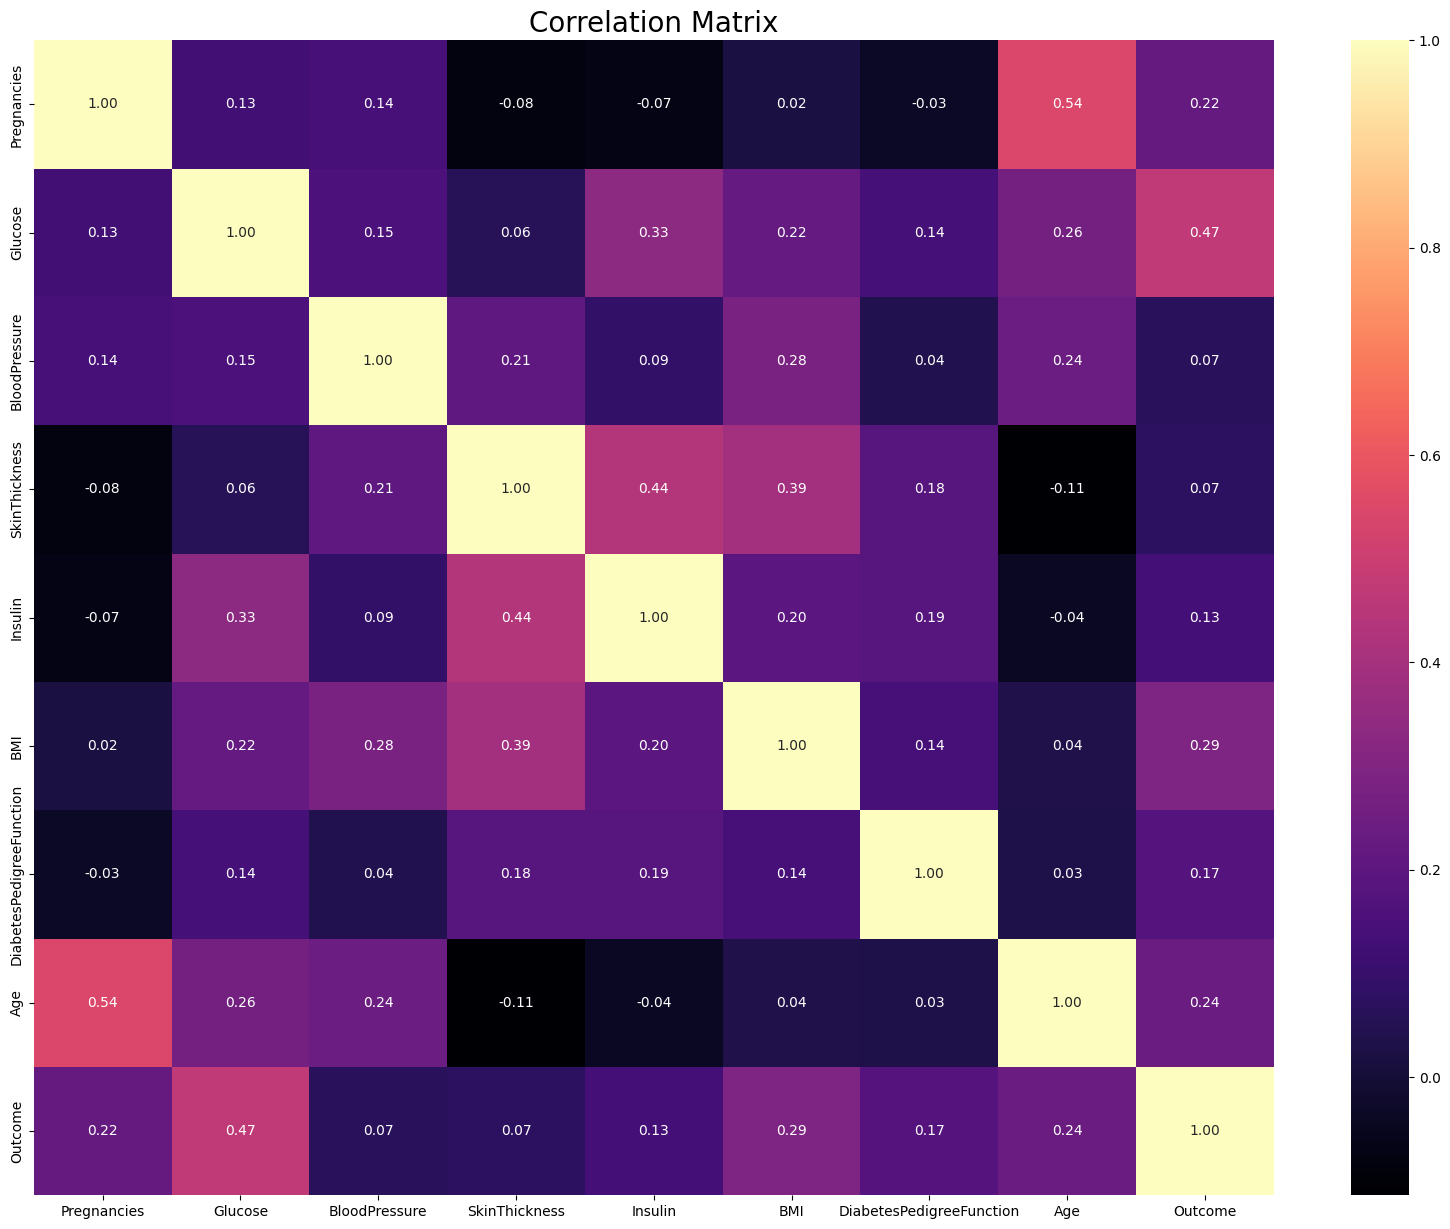

In [47]:
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()


Missing Values

In [48]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [49]:
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [24]:
columns = df.columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome']==0) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome']==1) & (df[i].isnull()), i] = median_target(i)[i][0]
    

Outliers

In [50]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [51]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-3.30445978, -2.48884101, -2.28758733, -2.10500141, -2.05369597,
       -2.02885837, -2.01096252, -2.00720763, -1.98655427, -1.95338702,
       -1.91601291, -1.88815728, -1.8134966 , -1.80857804, -1.74187579,
       -1.73154315, -1.71639102, -1.71372358, -1.67587303, -1.64102097,
       -1.63498158, -1.62215678, -1.61146741, -1.59344933, -1.54582494,
       -1.54285259, -1.51413703, -1.49974262, -1.49619189, -1.48877158])

In [52]:
threshold = np.sort(df_scores)[7]
threshold

-2.007207629622323

In [53]:
outlier = df_scores > threshold
df = df[outlier]

In [54]:
df.shape

(760, 9)

In [30]:
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    if df[(df[feature] > upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")    

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin no
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


In [35]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q1 + 1.5*IQR
df.loc[df["Insulin"] > upper, "Insulin"] = upper

Prediction

In [10]:
x = df.iloc[:,:-1]
y = df.Outcome

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2, stratify=y)

In [23]:
mm = MinMaxScaler()
x_train_scale = mm.fit_transform(x_train)
x_test_scale = mm.fit_transform(x_test)

In [29]:
LR = LogisticRegression(random_state=1, tol=0.000001, max_iter=10000)
LR.fit(x_train_scale, y_train)
print('score train =', LR.score(x_train_scale, y_train))
print('score test =', LR.score(x_test_scale, y_test))

score train = 0.7850162866449512
score test = 0.7597402597402597


In [47]:
y_pred = LR.predict(x_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print(f'MAPE: {round(mean_absolute_percentage_error(y_test, y_pred)*100,2)}%')
print('RMSE:', (mean_squared_error(y_test, y_pred)**0.5))
print('R2:', r2_score(y_test, y_pred))      

MAE: 0.6493506493506493
MAPE: 2.924415342448374e+17%
RMSE: 0.8058229640253803
R2: -1.851851851851852


In [35]:
svm = SVC(random_state=1)
param_grid = {'C':[1,3,0.1], 'gamma':[0.001,0.01,0.1], 'kernel':['linear','rbf']}
gs = GridSearchCV(svm, param_grid, scoring='accuracy')
gs.fit(x_train_scale, y_train)

GridSearchCV(estimator=SVC(random_state=1),
             param_grid={'C': [1, 3, 0.1], 'gamma': [0.001, 0.01, 0.1],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [36]:
gs.best_estimator_

SVC(C=3, gamma=0.001, kernel='linear', random_state=1)

In [37]:
gs.best_params_

{'C': 3, 'gamma': 0.001, 'kernel': 'linear'}

In [38]:
svm = SVC(kernel="linear", random_state=1, C=3, gamma=0.001)
svm.fit(x,y)
print('score train =', svm.score(x_train_scale, y_train))
print('score test =', svm.score(x_test_scale, y_test))

score train = 0.6514657980456026
score test = 0.6493506493506493


In [25]:
knn = KNeighborsClassifier()
knn.fit(x_train_scale,y_train)
print('score train =', knn.score(x_train_scale, y_train))
print('score test =', knn.score(x_test_scale, y_test))

score train = 0.8403908794788274
score test = 0.6753246753246753


19 : 0.7662337662337663
21 : 0.7662337662337663
24 : 0.7467532467532467
25 : 0.7597402597402597
29 : 0.7597402597402597
30 : 0.7532467532467533
31 : 0.7597402597402597
32 : 0.7792207792207793
33 : 0.7662337662337663
34 : 0.7727272727272727
35 : 0.7662337662337663
36 : 0.7727272727272727
37 : 0.7727272727272727
38 : 0.7727272727272727
39 : 0.7792207792207793
40 : 0.7727272727272727
41 : 0.7792207792207793
42 : 0.7662337662337663
43 : 0.7662337662337663
44 : 0.7532467532467533
45 : 0.7597402597402597
46 : 0.7532467532467533
47 : 0.7727272727272727
48 : 0.7597402597402597
49 : 0.7597402597402597


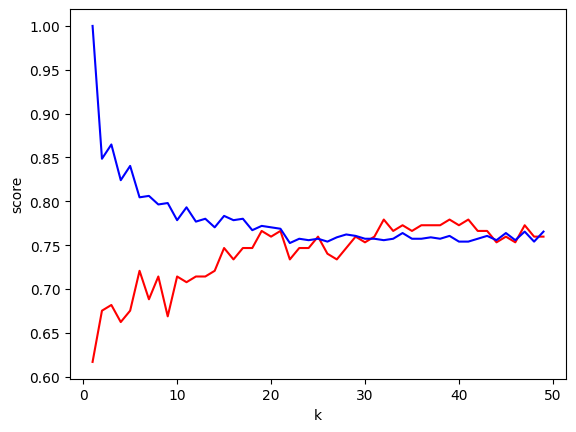

In [27]:
train_score = []
test_score = []
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scale,y_train)
    train_score.append(knn.score(x_train_scale,y_train))
    test_score.append(knn.score(x_test_scale,y_test))
    if (knn.score(x_train_scale,y_train) - knn.score(x_test_scale,y_test)) < 0.01:
        print(k, ':' , knn.score(x_test_scale,y_test))
plt.plot(range(1,50), test_score, color = 'r', label = 'test')
plt.plot(range(1,50), train_score, color = 'b', label = 'train')
plt.ylabel('score')
plt.xlabel('k')
plt.show()        

In [33]:
dt = DecisionTreeClassifier(random_state=1, min_samples_leaf=2, min_samples_split=2, max_depth=5)
dt.fit(x_train_scale, y_train)
print('score train =', dt.score(x_train_scale, y_train))
print('score test =', dt.score(x_test_scale, y_test))

score train = 0.8387622149837134
score test = 0.7337662337662337


In [42]:
model = RandomForestClassifier(n_estimators=150, max_depth=20 , max_features=0.8, max_samples=0.7, min_samples_leaf=3, n_jobs=-1)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, max_features=0.8, max_samples=0.7,
                       min_samples_leaf=3, n_estimators=150, n_jobs=-1)

In [43]:
print('score train = ', model.score(x_train, y_train))
print('score test = ', model.score(x_test, y_test))

score train =  0.9201954397394136
score test =  0.7402597402597403


In [44]:
y_pred = model.predict(x_test)
confusion = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       100
           1       0.66      0.54      0.59        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154

Confusion Matrix:
 [[85 15]
 [25 29]]
